<a href="https://colab.research.google.com/github/francomanca93/Alien-Invasion/blob/master/2.%20Caracterizar%20informaci%C3%B3n%20a%20traves%20del%20an%C3%A1lisis%20exploratorio/5_Visualizaci%C3%B3n_de_datos_usando_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de datos usando Python

Montamos drive para acceder a la base de datos con la cual vamos a trabajar

In [27]:
#Montamos Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import numpy as np
import pandas as pd
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [29]:
ls '/content/drive/My Drive/Colab Notebooks/fundamentos-de-estadistica-con-python/datos/'

bicicletas-compartidas.csv  datos_profesora.py  __pycache__/


In [30]:
cd '/content/drive/My Drive/Colab Notebooks/fundamentos-de-estadistica-con-python/datos/'

/content/drive/My Drive/Colab Notebooks/fundamentos-de-estadistica-con-python/datos


In [31]:
df = pd.read_csv('bicicletas-compartidas.csv')

## Variables categóricas

In [32]:
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [52]:
y = df['cuartil-ano'].apply(lambda x: 'cuartil-' + str(int(x)))

### Grafico de barra

Un [diagrama de barras](https://es.wikipedia.org/wiki/Diagrama_de_barras), también conocido como gráfico de barras o gráfico de columnas, es una forma de representar gráficamente un conjunto de datos o valores mediante barras rectangulares de longitud proporcional a los valores representados. Los gráficos de barras pueden ser usados para comparar cantidades de una variable en diferentes momentos o diferentes variables para el mismo momento. Las barras pueden orientarse horizontal y verticalmente. 

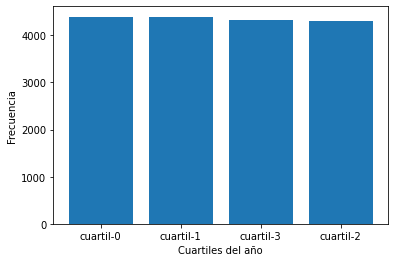

In [54]:
fig, ax = plt.subplots()
ax.bar(y.value_counts().index, y.value_counts())
ax.set_xlabel('Cuartiles del año')
ax.set_ylabel('Frecuencia')
plt.show()

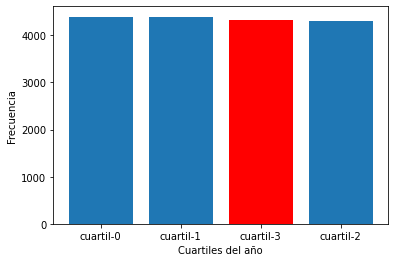

In [55]:
fig, ax = plt.subplots()
ax.bar(y.value_counts().index, y.value_counts())
ax.set_xlabel('Cuartiles del año')
ax.set_ylabel('Frecuencia')
ax.patches[2].set_facecolor('red')
plt.show()

### Grafico circular

Un [gráfico circular](https://es.wikipedia.org/wiki/Gr%C3%A1fico_circular) o gráfica circular, también llamado "gráfico de pastel", "gráfico de tarta", "gráfico de torta" o "gráfica de 360 grados", se utiliza para representar porcentajes y proporciones. El número de elementos comparados dentro de una gráfica circular suele ser de más de cuatro. 

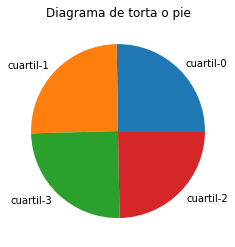

In [56]:
fig, ax = plt.subplots()
ax.pie(y.value_counts(), labels=y.value_counts().index)
ax.set_title('Diagrama de torta o pie')
plt.show()

## Variables numericas

### Histograma

Un [histograma](https://es.wikipedia.org/wiki/Histograma) es una representación gráfica de una variable en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados. Sirven para obtener una "primera vista" general, o panorama, de la distribución de la población, o de la muestra, respecto a una característica, cuantitativa y continua (como la longitud o el peso).

Se utilizan para relacionar variables cuantitativas continuas. Para variables cuantitativas discretas las barras se dibujan separadas y el gráfico se llama diagrama de frecuencias, porque la variable representada en el eje horizontal ya no representa un espectro continuo de valores, sino valores cuantitativos específicos, igual que ocurre en un diagrama de barras, usado para representar una característica cualitativa o categórica. Su utilidad se hace más evidente cuando se cuenta con un gran número de datos cuantitativos y que se han agrupado en intervalos de clase.

In [57]:
y_viento = df['viento']

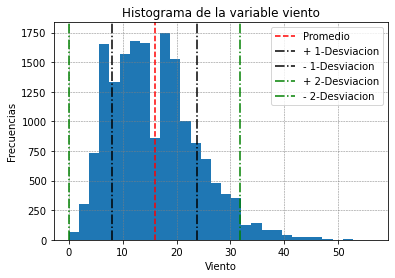

In [58]:
fig, ax = plt.subplots()
ax.hist(y_viento, bins=30)
ax.set_xlabel('Viento')
ax.set_ylabel('Frecuencias')

plt.axvline(np.mean(y_viento), c='r', linestyle='--', label='Promedio')

plt.axvline(np.mean(y_viento) + np.std(y_viento), c='k', linestyle='-.', label='+ 1-Desviacion')
plt.axvline(np.mean(y_viento) - np.std(y_viento), c='k', linestyle='-.', label='- 1-Desviacion')

plt.axvline(np.mean(y_viento) + 2*np.std(y_viento), c='g', linestyle='-.', label='+ 2-Desviacion')
plt.axvline(np.mean(y_viento) - 2*np.std(y_viento), c='g', linestyle='-.', label='- 2-Desviacion')

ax.set_title('Histograma de la variable viento')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.legend(loc='best')
plt.show()